#📌 Extracão e importação das bibliotecas

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)


###📌 Leitura do arquivo original

In [ ]:
dados.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

###🔧 Normalização e tradução

In [ ]:
customer_df = pd.json_normalize(dados['customer'])
phone_df = pd.json_normalize(dados['phone'])
internet_df = pd.json_normalize(dados['internet'])
account_df = pd.json_normalize(dados['account'])

dados_normalizados = pd.concat([dados.drop(columns=['customer', 'phone', 'internet', 'account']),
                                 customer_df, phone_df, internet_df, account_df], axis=1)

In [ ]:
#### Dicionário de dados

# * `customerID`: número de identificação único de cada cliente
# * `Churn`: se o cliente deixou ou não a empresa
# * `gender`: gênero (masculino e feminino)
# * `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
# * `Partner`:  se o cliente possui ou não um parceiro ou parceira
# * `Dependents`: se o cliente possui ou não dependentes
# * `tenure`:  meses de contrato do cliente
# * `PhoneService`: assinatura de serviço telefônico
# * `MultipleLines`: assisnatura de mais de uma linha de telefone
# * `InternetService`: assinatura de um provedor internet
# * `OnlineSecurity`: assinatura adicional de segurança online
# * `OnlineBackup`: assinatura adicional de backup online
# * `DeviceProtection`: assinatura adicional de proteção no dispositivo
# * `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
# * `StreamingTV`: assinatura de TV a cabo
# * `StreamingMovies`: assinatura de streaming de filmes
# * `Contract`: tipo de contrato
# * `PaperlessBilling`: se o cliente prefere receber online a fatura
# * `PaymentMethod`: forma de pagamento
# * `Charges.Monthly`: total de todos os serviços do cliente por mês
# * `Charges.Total`: total gasto pelo cliente

# Tradução das colunas para português


colunas_traduzidas = {
    'customerID': 'ID_cliente',
    'Churn': 'churn',
    'gender': 'sexo',
    'SeniorCitizen': '65+',
    'Partner': 'parceiro',
    'Dependents': 'dependentes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'servico_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'faturamento_sem_papel',
    'PaymentMethod': 'metodo_pagamento',
    'Charges.Monthly': 'gasto_mensal',
    'Charges.Total': 'gasto_total'
}

dados_normalizados = dados_normalizados.rename(columns=colunas_traduzidas)

###🔧 Adição e remoção de colunas

In [ ]:
# Remover a coluna na posição 0 (ID_cliente)
dados_normalizados = dados_normalizados.drop(dados_normalizados.columns[0], axis=1)

# Adicionar a coluna gasto_diario
dados_normalizados['gasto_diario'] = (dados_normalizados['gasto_mensal'] / 30).astype('float64')

###🔧 Alteração dos tipos

In [ ]:
colunas_para_bool = [2, 3, 4, 16]
nomes_colunas_bool = dados_normalizados.columns[colunas_para_bool]

for coluna in nomes_colunas_bool:
    # Converter para string primeiro para lidar com diferentes representações de booleanos
    dados_normalizados[coluna] = dados_normalizados[coluna].astype(str).str.lower()
    dados_normalizados[coluna] = dados_normalizados[coluna].replace({'Yes': True, 'No': False, 'Yes': True, 'No': False, '1': True, '0': False})
    dados_normalizados[coluna] = dados_normalizados[coluna].astype('bool')

/tmp/ipython-input-2807065515.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados[coluna] = dados_normalizados[coluna].replace({'Yes': True, 'No': False, 'Yes': True, 'No': False, '1': True, '0': False})


In [ ]:
dados_normalizados['gasto_total'] = pd.to_numeric(dados_normalizados['gasto_total'], errors='coerce')
dados_normalizados['gasto_total'] = dados_normalizados['gasto_total'].astype('float64')

In [ ]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churn                  7267 non-null   object 
 1   sexo                   7267 non-null   object 
 2   65+                    7267 non-null   bool   
 3   parceiro               7267 non-null   bool   
 4   dependentes            7267 non-null   bool   
 5   meses_de_contrato      7267 non-null   int64  
 6   servico_telefone       7267 non-null   object 
 7   multiplas_linhas       7267 non-null   object 
 8   servico_internet       7267 non-null   object 
 9   seguranca_online       7267 non-null   object 
 10  backup_online          7267 non-null   object 
 11  protecao_dispositivo   7267 non-null   object 
 12  suporte_tecnico        7267 non-null   object 
 13  streaming_tv           7267 non-null   object 
 14  streaming_filmes       7267 non-null   object 
 15  tipo

###🔧 Verificação de inconsistências

In [ ]:
colunas_para_excluir = [5, 18, 19, 20]

print("Valores únicos por coluna (exceto colunas 5, 18, 19 e 20):")
for i, coluna in enumerate(dados_normalizados.columns):
    if i not in colunas_para_excluir:
        print(f"- {coluna}: {dados_normalizados[coluna].unique()}")

Valores únicos por coluna (exceto colunas 5, 18, 19 e 20):
- churn: ['No' 'Yes' '']
- sexo: ['Female' 'Male']
- 65+: [False  True]
- parceiro: [ True]
- dependentes: [ True]
- servico_telefone: ['Yes' 'No']
- multiplas_linhas: ['No' 'Yes' 'No phone service']
- servico_internet: ['DSL' 'Fiber optic' 'No']
- seguranca_online: ['No' 'Yes' 'No internet service']
- backup_online: ['Yes' 'No' 'No internet service']
- protecao_dispositivo: ['No' 'Yes' 'No internet service']
- suporte_tecnico: ['Yes' 'No' 'No internet service']
- streaming_tv: ['Yes' 'No' 'No internet service']
- streaming_filmes: ['No' 'Yes' 'No internet service']
- tipo_contrato: ['One year' 'Month-to-month' 'Two year']
- faturamento_sem_papel: [ True]
- metodo_pagamento: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


###🔧 Ajuste de valores nulos e vazios



In [ ]:
print("Verificação de valores nulos ou vazios em todas as colunas:")
for coluna in dados_normalizados.columns:
    nulos = dados_normalizados[coluna].isnull().sum()
    vazios = (dados_normalizados[coluna] == '').sum()
    if nulos > 0 or vazios > 0:
        print(f"- Coluna '{coluna}': {nulos} valores nulos, {vazios} valores vazios")

Verificação de valores nulos ou vazios em todas as colunas:
- Coluna 'churn': 0 valores nulos, 224 valores vazios
- Coluna 'gasto_total': 11 valores nulos, 0 valores vazios


In [ ]:
dados_normalizados = dados_normalizados[dados_normalizados['churn'] != ''].copy()

print(f"Número de linhas após remover valores vazios na coluna 'churn': {dados_normalizados.shape[0]}")

Número de linhas após remover valores vazios na coluna 'churn': 7043


In [ ]:
# Preencher valores nulos na coluna 'gasto_total' com a mediana
mediana_gasto_total = dados_normalizados['gasto_total'].median()
dados_normalizados['gasto_total'] = dados_normalizados['gasto_total'].fillna(mediana_gasto_total)

# Verificar se ainda existem valores nulos na coluna 'gasto_total'
print(f"Número de valores nulos na coluna 'gasto_total' após o preenchimento: {dados_normalizados['gasto_total'].isnull().sum()}")

Número de valores nulos na coluna 'gasto_total' após o preenchimento: 0


#📊 Carga e análise

In [ ]:
dados_normalizados

,churn,sexo,65+,parceiro,dependentes,meses_de_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,faturamento_sem_papel,metodo_pagamento,gasto_mensal,gasto_total,gasto_diario
0,No,Female,False,True,True,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.186667
1,No,Male,False,True,True,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,True,Mailed check,59.90,542.40,1.996667
2,Yes,Male,False,True,True,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.463333
3,Yes,Male,True,True,True,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,True,True,True,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,False,True,True,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,True,Mailed check,55.15,742.90,1.838333
7263,Yes,Male,False,True,True,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.836667
7264,No,Male,False,True,True,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.676667
7265,No,Male,False,True,True,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,True,Mailed check,67.85,4627.65,2.261667


In [ ]:
churn_no_df = dados_normalizados[dados_normalizados['churn'] == 'No'].copy()
churn_yes_df = dados_normalizados[dados_normalizados['churn'] == 'Yes'].copy()

print("DataFrames criados:")
print(f"- Clientes com Churn 'No': {churn_no_df.shape[0]} linhas")
print(f"- Clientes com Churn 'Yes': {churn_yes_df.shape[0]} linhas")

DataFrames criados:
- Clientes com Churn 'No': 5174 linhas
- Clientes com Churn 'Yes': 1869 linhas


In [566]:
# Separação das colunas por tipo
colunas_categoricas = dados_normalizados.select_dtypes(include=['object', 'bool']).columns.tolist()
colunas_numericas = dados_normalizados.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'churn' in colunas_categoricas:
    colunas_categoricas.remove('churn')

print("Colunas Categóricas (excluindo 'churn'):", colunas_categoricas)
print("Colunas Numéricas:", colunas_numericas)
print(f"Total de registros: {len(dados_normalizados)}")
print(f"\nVariáveis categóricas: {len(colunas_categoricas)}")
print(f"Variáveis numéricas: {len(colunas_numericas)}")

# Análise da distribuição do churn

print("DISTRIBUIÇÃO DO CHURN")
print("="*50)
churn_counts = dados_normalizados['churn'].value_counts()
churn_percent = dados_normalizados['churn'].value_counts(normalize=True) * 100
print("\nContagem absoluta:")
print(churn_counts)
print("\nPercentual:")
for valor, pct in churn_percent.items():
    print(f"{valor}: {pct:.2f}%")

# Análise das variáveis categóricas vs churn
print("\n" + "="*50)
print("ANÁLISE DAS VARIÁVEIS CATEGÓRICAS VS CHURN")
print("="*50)

for coluna in colunas_categoricas:
    print(f"\n--- {coluna.upper()} ---")

    # Tabela cruzada
    crosstab = pd.crosstab(dados_normalizados[coluna], dados_normalizados['churn'], margins=True)
    print("\nTabela cruzada (contagem):")
    print(crosstab)

    # Percentuais por linha (% de churn para cada categoria)
    crosstab_pct = pd.crosstab(dados_normalizados[coluna], dados_normalizados['churn'], normalize='index') * 100
    print(f"\nPercentual de churn por {coluna}:")
    for categoria in crosstab_pct.index:
        if 'Yes' in crosstab_pct.columns or 1 in crosstab_pct.columns:
            churn_col = 'Yes' if 'Yes' in crosstab_pct.columns else 1
            print(f"  {categoria}: {crosstab_pct.loc[categoria, churn_col]:.2f}%")

    print("-" * 40)

# Análise das variáveis numéricas vs churn
print("\n" + "="*50)
print("ANÁLISE DAS VARIÁVEIS NUMÉRICAS VS CHURN")
print("="*50)

for coluna in colunas_numericas:
    print(f"\n--- {coluna.upper()} ---")

    # Estatísticas descritivas por grupo de churn
    stats_por_churn = dados_normalizados.groupby('churn')[coluna].describe()
    print("\nEstatísticas descritivas por churn:")
    print(stats_por_churn.round(2))

    # Diferença entre médias
    mean_no_churn = dados_normalizados[dados_normalizados['churn'] == 'No'][coluna].mean()
    mean_churn = dados_normalizados[dados_normalizados['churn'] == 'Yes'][coluna].mean()

    # Adaptar para diferentes formatos de churn (Yes/No ou 0/1)
    if 'Yes' not in dados_normalizados['churn'].values:
        mean_no_churn = dados_normalizados[dados_normalizados['churn'] == 0][coluna].mean()
        mean_churn = dados_normalizados[dados_normalizados['churn'] == 1][coluna].mean()

    print(f"\nMédia sem churn: {mean_no_churn:.2f}")
    print(f"Média com churn: {mean_churn:.2f}")
    print(f"Diferença: {mean_churn - mean_no_churn:.2f}")

    print("-" * 40)

Colunas Categóricas (excluindo 'churn'): ['sexo', '65+', 'parceiro', 'dependentes', 'servico_telefone', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'faturamento_sem_papel', 'metodo_pagamento']
Colunas Numéricas: ['meses_de_contrato', 'gasto_mensal', 'gasto_total', 'gasto_diario']
Total de registros: 7043

Variáveis categóricas: 16
Variáveis numéricas: 4
DISTRIBUIÇÃO DO CHURN

Contagem absoluta:
churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentual:
No: 73.46%
Yes: 26.54%

ANÁLISE DAS VARIÁVEIS CATEGÓRICAS VS CHURN

--- SEXO ---

Tabela cruzada (contagem):
churn     No   Yes   All
sexo                    
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043

Percentual de churn por sexo:
  Female: 26.92%
  Male: 26.16%
----------------------------------------

--- 65+ ---

Tabela cruzada (contagem):
churn    No   Yes   All
6

# Relatório Final

## Visão Geral
- **Taxa de Churn**: 26.54% (1.869 de 7.043 clientes)
- **Taxa de Retenção**: 73.46% (5.174 clientes)
- Dataset com desbalanceamento moderado, mas adequado para análise

## **Principais Fatores de Risco para Churn**

### 1. **Tipo de Contrato** - CRÍTICO
- **Mês-a-mês**: 42.71% de churn
- **Um ano**: 11.27% de churn  
- **Dois anos**: 2.83% de churn

*Contratos de longo prazo reduzem drasticamente o churn. A flexibilidade mensal é um grande fator de risco.*

### 2. **Método de Pagamento** - ALTO RISCO
- **Electronic check**: 45.29% de churn
- **Mailed check**: 19.11% de churn
- **Métodos automáticos**: ~15-17% de churn

*Pagamento por cheque eletrônico indica possível instabilidade financeira ou dificuldade de pagamento.*

### 3. **Tipo de Internet** - ALTO RISCO
- **Fiber optic**: 41.89% de churn
- **DSL**: 18.96% de churn
- **Sem internet**: 7.40% de churn

*Fibra ótica apresenta taxa de churn alarmante, sugerindo problemas de qualidade, preço ou expectativas não atendidas.*

### 4. **Faixa Etária** - MODERADO
- **65+ anos**: 41.68% de churn
- **Menos de 65**: 23.61% de churn

*Clientes idosos apresentam maior propensão ao churn, possivelmente por mudanças de necessidade ou sensibilidade a preço.*

---

## **Padrões Comportamentais Críticos**

### **Tempo de Relacionamento**
- **Clientes com churn**: 17.98 meses em média
- **Clientes fiéis**: 37.57 meses em média
- **Diferença**: -19.59 meses

*Clientes novos (primeiros 18 meses) são extremamente vulneráveis ao churn.*

### **Paradoxo do Gasto**
- **Gasto mensal médio**:
  - Com churn: R$ 74.44

  - Sem churn: R$ 61.27

- **Gasto total médio**:
  - Com churn: R$ 1.531,80

  - Sem churn: R$ 2.552,87

*Clientes que fazem churn gastam mais por mês, mas ficam menos tempo, resultando em menor valor total. Isso sugere que preços altos podem estar expulsando clientes.*

---

## **Serviços Adicionais como Proteção**

### **Baixa Adesão = Alto Risco**
- **Sem segurança online**: 41.77% de churn
- **Sem backup online**: 39.93% de churn  
- **Sem proteção de dispositivo**: 39.13% de churn
- **Sem suporte técnico**: 41.64% de churn

*Clientes que não aderem a serviços adicionais têm duas vezes mais chance de churn. Esses serviços criam "stickiness" (maior engajamento).*

---

## **Fatores Neutros**
- **Sexo**: Diferença mínima (26.92% F vs 26.16% M)
- **Serviço telefônico**: Pouco impacto (24.93% vs 26.71%)
- **Streaming services**: Impacto moderado (~30-33%)

---
---
---
## **Recomendações Estratégicas**

### **Ações Imediatas**
1. **Migrar contratos mês-a-mês** para anuais com incentivos
2. **Investigar problemas com fibra ótica** - qualidade/preço/suporte
3. **Incentivar métodos de pagamento automáticos**
4. **Programa especial de retenção para primeiros 18 meses**

### **Ações Táticas (Médio Prazo)**
1. **Estratégia diferenciada para 65+** - produtos/preços adaptados
2. **Conjunto de serviços adicionais** para aumentar engajamento
3. **Revisão de preços** - clientes gastando mais têm mais churn

### **Ações de Monitoramento**
1. **Early warning system** para clientes novos com perfil de risco
2. **Campanhas de up-sell** para serviços adicionais
3. **Programa de fidelidade** baseado em tempo de relacionamento

---

## **Próximos Passos Analíticos**
1. **Sistema de alerta precoce** para entender quando o churn ocorre
2. **Modelo preditivo** usando as variáveis identificadas
3. **Segmentação de clientes** por perfil de risco
4. **Análise de valor do cliente** (CLV) por segmento

---
---
---
**Impacto Potencial**: Com taxa atual de 26.54%, melhorias nas variáveis críticas podem resultar em retenção significativa de receita e redução de custos de aquisição.
---
---
---

In [556]:
palette_suave = {'No': '#a2d9ce', 'Yes': '#f7b2a3'}
plt.style.use('seaborn-v0_8-darkgrid')

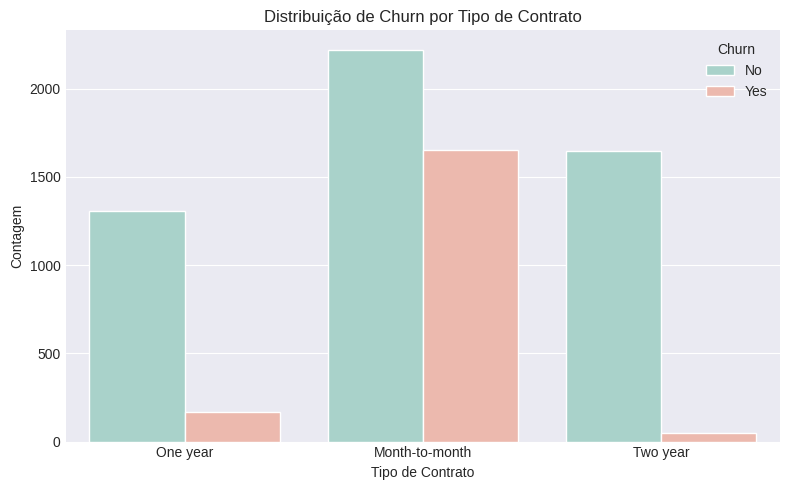

In [557]:
# Gráfico para Tipo de Contrato
plt.figure(figsize=(8, 5))
sns.countplot(data=dados_normalizados, x='tipo_contrato', hue='churn', palette=palette_suave)
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

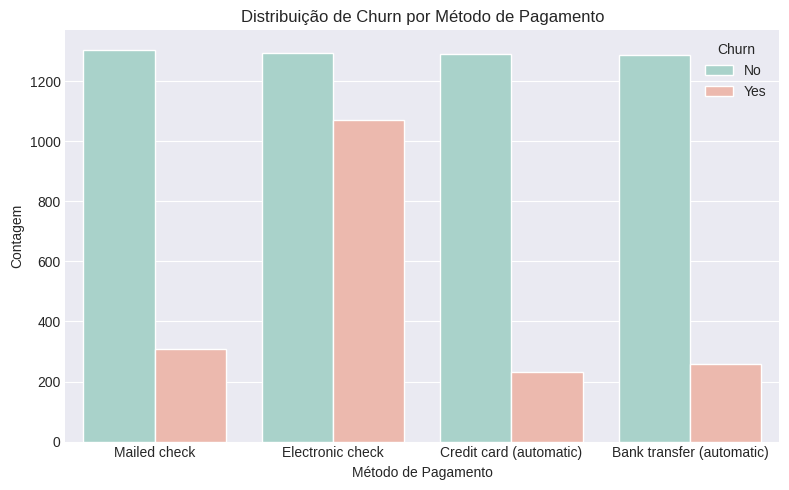

In [558]:
# Gráfico para Método de Pagamento
plt.figure(figsize=(8, 5))
sns.countplot(data=dados_normalizados, x='metodo_pagamento', hue='churn', palette=palette_suave)
plt.title('Distribuição de Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

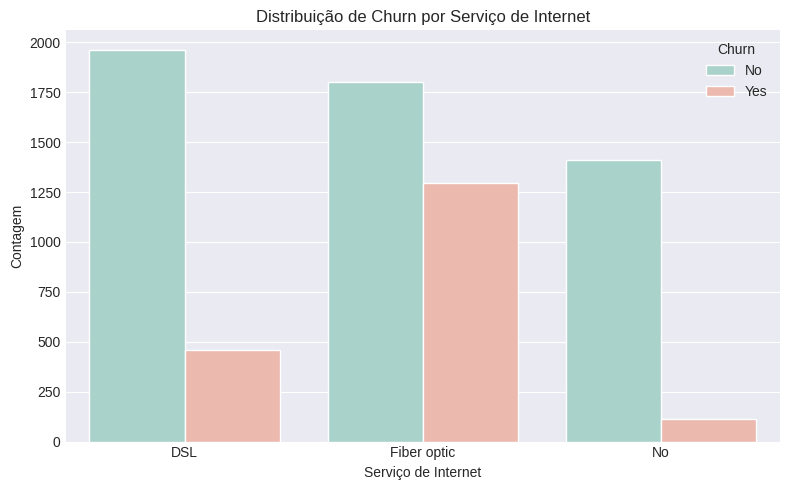

In [554]:
# Gráfico para Serviço de Internet
plt.figure(figsize=(8, 5))
sns.countplot(data=dados_normalizados, x='servico_internet', hue='churn', palette=palette_suave)
plt.title('Distribuição de Churn por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

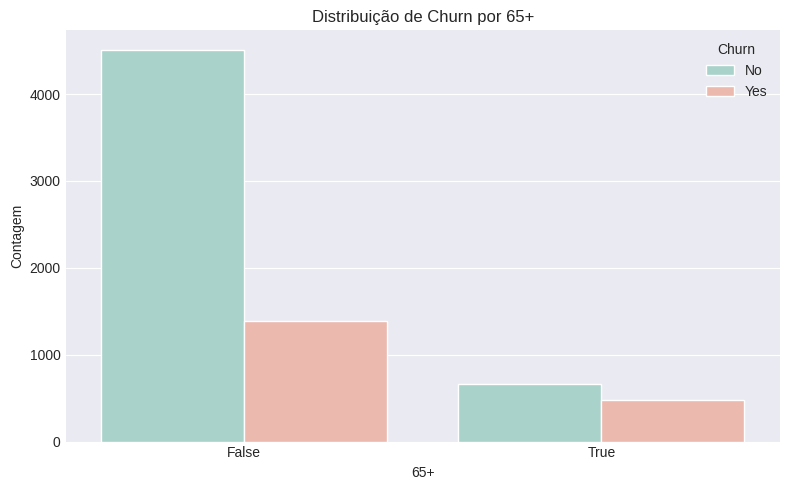

In [553]:
# Gráfico para 65+
plt.figure(figsize=(8, 5))
sns.countplot(data=dados_normalizados, x='65+', hue='churn', palette=palette_suave)
plt.title('Distribuição de Churn por 65+')
plt.xlabel('65+')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

/tmp/ipython-input-244553243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_normalizados, x='churn', y='meses_de_contrato', palette=palette_suave)


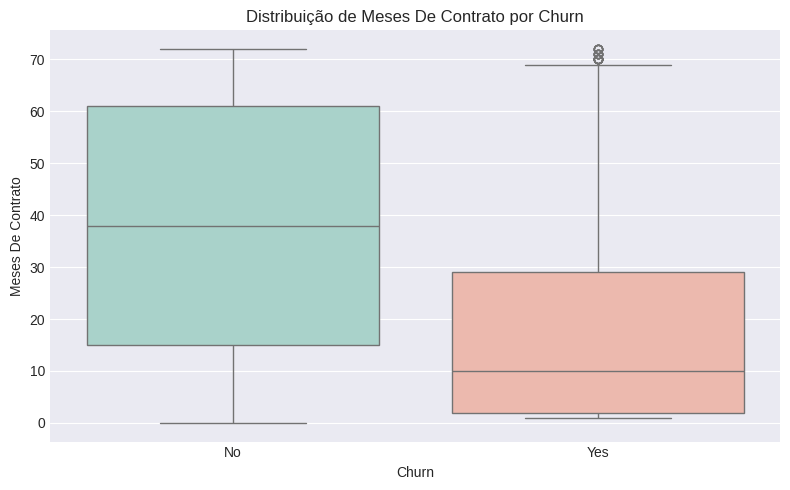

In [560]:
# Gráfico para Meses de Contrato
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_normalizados, x='churn', y='meses_de_contrato', palette=palette_suave)
plt.title('Distribuição de Meses De Contrato por Churn')
plt.xlabel('Churn')
plt.ylabel('Meses De Contrato')
plt.tight_layout()
plt.show()

/tmp/ipython-input-741750042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_normalizados, x='churn', y='gasto_mensal', palette=palette_suave)


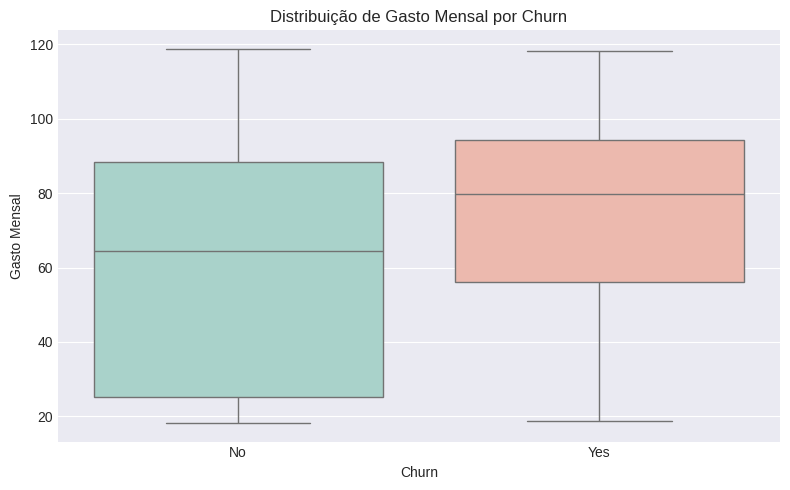

In [561]:
# Gráfico para Gasto Mensal
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_normalizados, x='churn', y='gasto_mensal', palette=palette_suave)
plt.title('Distribuição de Gasto Mensal por Churn')
plt.xlabel('Churn')
plt.ylabel('Gasto Mensal')
plt.tight_layout()
plt.show()

/tmp/ipython-input-861640895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_normalizados, x='churn', y='gasto_total', palette=palette_suave)


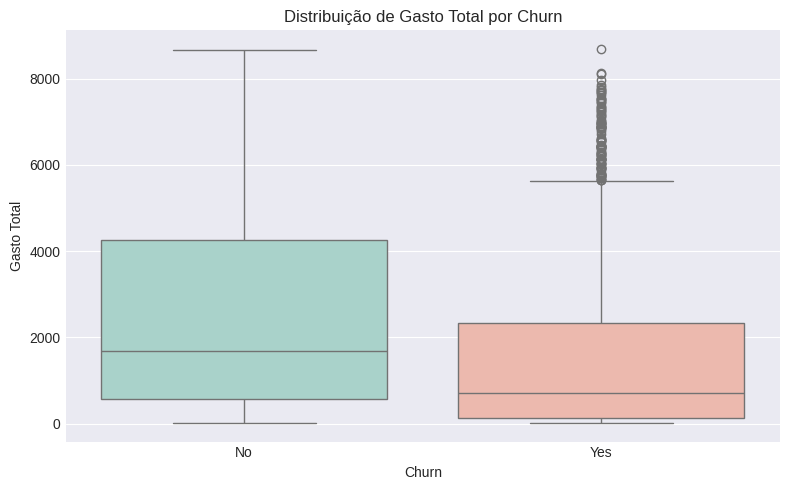

In [562]:
# Gráfico para Gasto Total
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_normalizados, x='churn', y='gasto_total', palette=palette_suave)
plt.title('Distribuição de Gasto Total por Churn')
plt.xlabel('Churn')
plt.ylabel('Gasto Total')
plt.tight_layout()
plt.show()